# [PUBPOL/ETHSTD C164A] 3. Exploring Labor Statistics Among U.S. Youth

**Estimated time:** 75 minutes

**Notebook developed by:** <br>
Team Lead: Skye Pickett  <br>
Fall 2022 Developers: Leah Hong, Emily Guo, Reynolds Zhang <br>
Summer 2022 Developers: Vaidehi Bulusu, Leah Hong, Drishti Gupta, Hans Ocampo <br>


### Learning Outcomes
- Learn to understand context of data sources
- Manipulate tables to aid analysis
- Use functions to categorize data
- Analyze visualizations that represent people


### Table of Contents
1. [Introduction to U.S. BLS Datasets](#1.-Introduction-to-U.S.-BLS-Datasets)
1. [Wages Among the Youth](#2.-Wages-Among-the-Youth)
1. [Wages Among All Groups](#3.-Wages-Among-All-Groups)
1. [Wage Differences Among Youth Between Ethnicities](#4.-Wage-Differences-Among-Youth-Between-Ethnicities)
1. [Employment Among Youth](#5.-Employment-Among-Youth)
1. [Conclusion](#6.-Conclusion)
1. [Submitting Your Work](#7.-Submitting-Your-Work)
1. [Explore Data Science Opportunities](#8.-Explore-Data-Science-Opportunities)
1. [Feedback Form](#9.-Feedback-Form)

***

### Helpful Data Science Resources 
Here are some resources you can check out while doing this notebook and to explore data research further!
- [DATA 8 Textbook](https://inferentialthinking.com/chapters/06/Tables.html) - Tables chapter
- [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)
- [Documentation for the datascience Modules](http://data8.org/datascience/index.html)
- [Statistica: Find Data on Interesting Topics](https://www.statista.com/)
- [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis)


### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

# 1. Introduction to U.S. BLS Datasets

Before we continue, run the bellow cell to import the necessary packages.


In [4]:
# RUN THIS CELL
# import the required packages
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline

import otter
grader = otter.Notebook()

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
print("All necessary packages have been imported!")

All necessary packages have been imported!


Before discussing wages among youth, I would recommend to have a section before that is just dedicated to reading the data, hyperlinking the source of the data, providing a description of the data, and have students take a column and row and discuss what it means. Talk about the different columns in the dataset and what they represent. You can even ask questions to the students to have them interpret the data as well.
See Section 3.1 in DSUS Modules Notebook Outline


Today, we will be analyzing the characteristics of the labor market for young people in the United States, utilizing the skills we have learned in the two previous Modules notebooks. We will discover patterns and trends over the years regarding employment and wages among American youth, utilizing datasets from the [US Bureau of Labor Statistics](https://www.bls.gov/data/). Here we define *youth* to be between the ages of 16 and 24 years old. 

The dataset, that we will call `earnings`, represents the earnings of employed persons, derived from the Current Population Survey.  The wages represented include earnings before taxes and other deductions, and include any overtime pay, commissions, or tips usually received. As you may notice from the names of each column, the dataset covers the total number of workers and median weekly earnings annually for various age groups and sex among the years 2000-2021. 

    
> `Table().read_table(...)`: allows you to import data as a table (takes in the name of the csv file as the argument)
    

In [5]:
earnings = Table().read_table("Data/Earnings.csv")
#earnings = Table().read_table("Data/Earnings.csv")
earnings

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,All,361
2001,16-24 Years Old,All,All,375
2002,16-24 Years Old,All,All,381
2003,16-24 Years Old,All,All,387
2004,16-24 Years Old,All,All,390
2005,16-24 Years Old,All,All,397
2006,16-24 Years Old,All,All,409
2007,16-24 Years Old,All,All,424
2008,16-24 Years Old,All,All,443
2009,16-24 Years Old,All,All,442


Let's use `.labels` to view the column titles.

In [6]:
earnings.labels

('Year', 'Age', 'Sex', 'Ethnicity', 'Median Weekly Earnings')

Notice that age is a *string* that explains an age range, rather than an integer representing an individual age. The three unique values in the "Sex" column are: All, Male, and Female. Our earnings table represents all ethnicities from the survey data. Thus, the only unique value in the "Ethnicity" column is "All".

Let's look at a random row and make sure we understand what it means. 

In [7]:
earnings.take(30)

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2008,16-24 Years Old,Male,All,461


For this row, the data represents only males in the 16-24 age range with different ethnicities. This row represents only people who took the survey in 2008. "Median Weekly Earnings" means that of the survey-takers who fell into this category, the weekly earnings were sorted from lowest to highest, then the middle value was chosen. The median is a statistical measure of a distribution of data; review the [definition of median](https://www.investopedia.com/terms/m/median.asp).

# 2. Wages Among the Youth

We are going to use some of the methods in this reference sheet, and you will learn more about them in your homework. 

**Please open this reference sheet in another tab to reference as we work through the notebook:
  [Reference Sheet for the datascience Module](http://data8.org/sp22/python-reference.html)**
  
The goal of this section is to learn about basic table manipulation methods and to create a line graph of sex wage differences by year.


<!-- BEGIN QUESTION -->

<font color = #d14d0f>

#### Question 1a:
In the cell below, create two tables `youth_earnings` and `all_earnings` derived from the `earnings` table. 
- `youth_earnings` contains data on 16-24 Year Olds of all Sexes and Ethnicities 
- `all_earnings` contains data on all laborers of all Sexes and Ethnicities


> `.where`: filter a table based on the values of a particular column (see the `Table.where` Predicates section of the [Python reference](http://data8.org/sp22/python-reference.html) for the list of predicates you can use)
     
We created `youth_earnings` for you. Now, create `all_earnings` replacing the `...`s with your code!

In [11]:
# create two separate tables
youth_earnings = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("All"))
all_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("All"))

In [12]:
youth_earnings.show(3)

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,All,361
2001,16-24 Years Old,All,All,375
2002,16-24 Years Old,All,All,381


In [13]:
all_earnings.show(3)

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,All,All,All,576
2001,All,All,All,596
2002,All,All,All,608


<!-- END QUESTION -->
<!-- BEGIN QUESTION -->

<font color = #d14d0f>
    
#### Question 1b:
Compute the average of median weekly earnings for each table and find the difference between their wages. 

In [14]:
# find the difference in the average median weekly earnings between youth_earnings and all_earnings
youth_earnings_avg = np.mean(youth_earnings.column("Median Weekly Earnings"))
all_earnings_avg = np.mean(all_earnings.column("Median Weekly Earnings")) 
diff = all_earnings_avg - youth_earnings_avg
diff = np.round(diff, 2)

print("The average American worker makes $" + str(diff)+ " more than the average American Youth worker on a weekly basis.")

The average American worker makes $296.32 more than the average American Youth worker on a weekly basis.


<!-- END QUESTION -->

**Read the statement that your code returned above.**
<!-- BEGIN QUESTION -->

<font color = #d14d0f>
    
#### Question 2:
    
Why do you think that the returned statement above is the case?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->

<br> Let's now compare how the wages differ among male and female youth, and discover how this trend over the years parallels with the overall wage difference between men and women.

<!-- BEGIN QUESTION -->

<font color = #d14d0f>
    
#### Question 3a:
   Find the median weekly earnings for *16-24 years old men*. The `youth_male_earnings_tbl` should be a table with rows that satisfy the criteria in the last sentence. The second line of code collects the Median Weekly Earnings of those rows and returns them. Remember to use the reference sheet and earlier activities to help you.

In [15]:
youth_male_earnings_tbl = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Male"))
youth_male_earnings = youth_male_earnings_tbl.column("Median Weekly Earnings")
youth_male_earnings

array([375, 391, 391, 398, 400, 409, 418, 443, 461, 458, 443, 455, 468,
       479, 493, 510, 512, 547, 575, 607, 622, 650])

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->

<font color = #d14d0f>
    
#### Question 3b:
   Find the median weekly earnings for 16-24 years old women. The output variable `youth_female_earnings` should be an array.
    
   *Hint: Use `.where` twice since there are two different criteria in the above statement.*

In [16]:
youth_female_earnings_tbl = earnings.where("Age", are.equal_to("16-24 Years Old")).where("Sex", are.equal_to("Female"))
youth_female_earnings = youth_female_earnings_tbl.column("Median Weekly Earnings")
youth_female_earnings

array([344, 353, 367, 371, 375, 381, 395, 409, 420, 424, 422, 421, 416,
       423, 451, 450, 486, 499, 522, 540, 589, 605])

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->

<font color = #d14d0f>

#### Question 4:
Find the **difference** of the median weekly earnings for 16-24 years old men and women. `youth_male_earnings` and `youth_female_earnings` are both *arrays*. 
>Remember that the type of `earnings` is a Table. Every column in a table is an array. Every column is an array regardless of what kind of data it contains. An array is basically a list of values.
    
The output variable `youth_wage_diff` should be an array. *Hint: Adding or subtracting two arrays returns an array.*
    
    
**Try to guess the result of the difference before running the below code cell. In the markdown cell below, write what you notice about these values. Are they positive or negative? What does this indicate? Was your guess correct?**

In [17]:
youth_wage_diff = youth_male_earnings - youth_female_earnings
youth_wage_diff

array([31, 38, 24, 27, 25, 28, 23, 34, 41, 34, 21, 34, 52, 56, 42, 60, 26,
       48, 53, 67, 33, 45])

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->

<font color = #d14d0f>

#### Question 5:
   Now, let's **create a new table** containing the `Year`, `Median Weekly Earnings (16-24 Years Old Men)`, `Median Weekly Earnings (16-24 Years Old Women)`, and a column containing the **difference** between the two earnings each year called `Wage Difference`. <br>*Hint: Remember we just created an array of wage differences for youth in Question 4.*


> `Table().with_columns`: create a new table by adding columns (the first argument is the name of the column and the second argument is the array) <br>
> `tablename.column(columnname)`: select a column from a given table; returns as an array
    

In [18]:
youth_diff_tbl = Table().with_columns("Year", youth_earnings.column("Year"),
                                "Median Weekly Earnings (16-24 Years Old Men)", youth_male_earnings,
                                "Median Weekly Earnings (16-24 Years Old Women)", youth_female_earnings,
                                "Wage Difference", youth_wage_diff)
youth_diff_tbl.show(5)

Year,Median Weekly Earnings (16-24 Years Old Men),Median Weekly Earnings (16-24 Years Old Women),Wage Difference
2000,375,344,31
2001,391,353,38
2002,391,367,24
2003,398,371,27
2004,400,375,25


<!-- END QUESTION -->
The `youth_diff_tbl` should have 4 columns and 22 rows. Use the next cells to check that your table matches with these values.

In [19]:
youth_diff_tbl.num_rows

22

In [20]:
len(youth_diff_tbl)

4

Now that we know the wage differences, let's calculate what year saw the biggest wage difference between young men and women. We'll use `.sort` to organize the table based on the `Wage Difference` column.
> **`tablename.sort()`**: Creates a copy of a table sorted by the values in a column. Defaults to ascending order unless *descending = True* is included.

In [21]:
sorted_tbl = youth_diff_tbl.sort("Wage Difference", descending=True)
sorted_tbl

Year,Median Weekly Earnings (16-24 Years Old Men),Median Weekly Earnings (16-24 Years Old Women),Wage Difference
2019,607,540,67
2015,510,450,60
2013,479,423,56
2018,575,522,53
2012,468,416,52
2017,547,499,48
2021,650,605,45
2014,493,451,42
2008,461,420,41
2001,391,353,38


Notice how the rows are in a different order than they were in `youth_diff_tbl`. 

To obtain just the value of the year with the biggest wage gap, we'll select just the column "Year" using `.column('Year')`. This will return an array with all the values of that column.

In [22]:
sorted_tbl.column('Year')

array([2019, 2015, 2013, 2018, 2012, 2017, 2021, 2014, 2008, 2001, 2007,
       2009, 2011, 2020, 2000, 2005, 2003, 2016, 2004, 2002, 2006, 2010])

To select the first item, which corresponds to the first row of the sorted table, we use `.item(0)` to select it. In Python, lists and arrays are "zero-indexed"; this means that the first item in the list has index 0, second item has index 1, and so on. Thus, to get the first item, we select the item at the 0th index.

In [23]:
sorted_tbl.column('Year').item(0)

2019

If you look back at `sorted_tbl`, you'll notice that the first row shows the year 2019 with the wage difference of 67 between male and female youth (the largest wage gap of the table). Notice also that this can all be done in one line of code (see below), but to understand each step it can be very helpful to walk through the process and see what is returned.

In [24]:
youth_diff_tbl.sort("Wage Difference", descending = True).column('Year').item(0)

2019

<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 6:
   Create a line plot of the wage difference between young men and women over time. *Plot the unit for time on the x-axis.*

*Hint: Use `.plot`. You can also reference section 4.1 of the Data Visualization Notebook on Line Plots.*<br>
   *Remember that the arguments of the plot functions need to be column names.*
    
> `tablename.plot("x_column", "y_column")`: create a line plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)

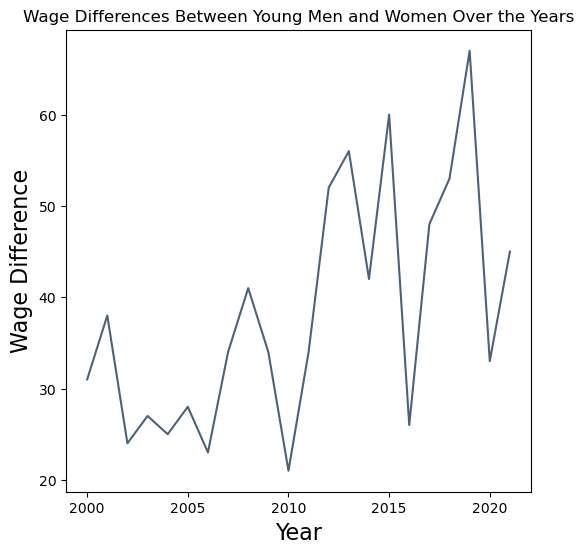

In [26]:
youth_diff_tbl.plot("Year", "Wage Difference");
plt.title("Wage Differences Between Young Men and Women Over the Years");

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 7:
   Looking at the graph you created, what do you notice? (How has the wage difference changed over time?)

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->
***
# 3. Wages Among All Groups
Similarly to what we did in Section 2 Question 5, we're now creating a new table for **All** age groups containing the `Year`, `Median Weekly Earnings (Men)`, `Median Weekly Earnings (Women)`, and a new column containing the **difference** between the two earnings each year. <br>
We've written the code out for you. Read through it "in English" (meaning translate the code into a sentence) to make sure you understand what's being done. These steps were done previously so the goal is that you understand all of the code written in the cell below.
> ie) `male_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")`<br>
--> <br>
male_earnings is the name of some variable (not sure what type yet). We are taking the earnings table and selecting only the rows where the Age is All and where the Sex is Male. After this, we are selecting just the "Median Weekly Earnings" column. That means male_earnings is an array with the median weekly earnings from the adjusted table that only has Age = "All" and Sex = "Male" values. These are the values we're going to use for the "Median Weekly Earnings (Men)" column in the new table being made.

In [27]:
male_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Male")).column("Median Weekly Earnings")
female_earnings = earnings.where("Age", are.equal_to("All")).where("Sex", are.equal_to("Female")).column("Median Weekly Earnings")

MWearnings = all_earnings.select("Year")
MWearnings = MWearnings.with_column("Median Weekly Earnings (Men)", male_earnings).with_column("Median Weekly Earnings (Women)", female_earnings)
wage_diff = MWearnings.column("Median Weekly Earnings (Men)")-MWearnings.column("Median Weekly Earnings (Women)")

MWearnings = MWearnings.with_column("Wage Difference", wage_diff)
MWearnings.show(5)

Year,Median Weekly Earnings (Men),Median Weekly Earnings (Women),Wage Difference
2000,641,493,148
2001,670,512,158
2002,679,529,150
2003,695,552,143
2004,713,573,140


<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 8:
In the cell below, determine what year had the biggest wage difference between men and women based on the `MWearnings` table above. <br>
*Hint: Use the example after Question 5 for guidance if you're unsure.*

In [28]:
all_biggest_diff_yr = MWearnings.sort("Wage Difference", descending = True).column('Year').item(0)
all_biggest_diff_yr

2020

Your answer should be 2020!

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 9:
   Create a line plot of the wage difference between men and women over time.
> `tablename.plot("x_column", "y_column")`: create a line plot (the first argument is the variable on the x-axis and the second argument is the variable on the y-axis)

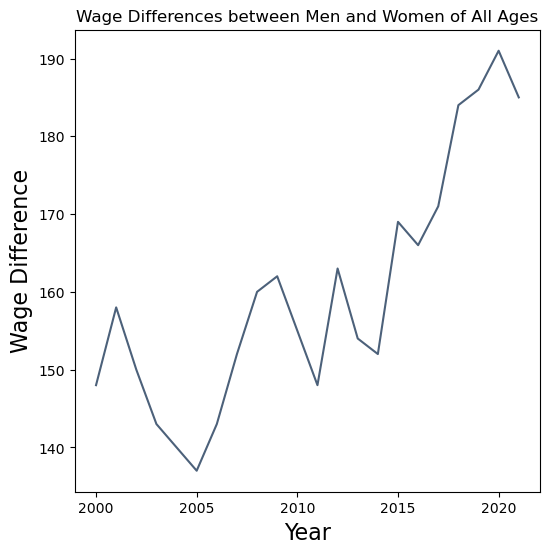

In [31]:
MWearnings.plot("Year", "Wage Difference");
plt.title("Wage Differences between Men and Women of All Ages");

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 10:
Now looking at both of the graphs you created, what do you notice? Are there similarities in the gender wage gaps present between youth and those of all ages?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->
***
# 4. Wage Differences Among Youth Between Ethnicities

The data below was pulled from the same data source, the Bureau of Labor Statistics, through this data filtering [table](https://www.bls.gov/webapps/legacy/cpswktab3.htm). 

In this section, we will explore the relationship between race, sex, and wages. Feel free to explore through the data and find different statistics.

The table below represents the number of workers and median weekly earnings of workers between 16-24 years old, separated by ethnicity and sex. 

In [32]:
wages_ethnicity = Table.read_table("Data/YouthEarningsByEthnicity.csv")
wages_ethnicity.show(3)

Year,Age,Sex,Ethnicity,Median Weekly Earnings
2000,16-24 Years Old,All,White,366
2001,16-24 Years Old,All,White,380
2002,16-24 Years Old,All,White,386


## 4.1 Grouping by Sex and Ethnicity 
In this next activity, we'll find the largest difference between the average median weekly earnings between two demographic groups. This will use the `.group` function. First, we'll run through some examples.

`.group` is often difficult to grasp initially so we're providing a demo. In future notebooks you will want to use `.group` yourself so it's to your benefit to take this section slowly to understand. *Remember there is a section at the start of each notebook for resources if you're wanting further help.*

Here we'll create a table called `demographic_earnings` containing the mean of Median Weekly Earnings for each possible demographic group combination. 

[This page on the `group` function](https://inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html?highlight=group) from the Data8 Textbook is an excellent resource with great examples!

Let's try using the group function. 
> **`tablename.group(column_name(s), func)`**: Group rows by unique values or combinations of values in a column(s). Multiple columns must be entered in array or list form. Other values aggregated by count (default) or optional argument func.

In [33]:
wages_ethnicity.group("Sex")

Sex,count
All,88
Female,88
Male,88


As mentioned in the documentation above, the *func* argument is optional and the default function is "count". This means that when we group by the column "Sex", it does 2 things:
1. creates a new column with just the 3 unique values of the "Sex" column (which are All, Female, and Male)
1. counts how many rows belong to each of the unique values of the "Sex" column

The above table tells us that `wage_ethnicity` has the same number of rows that represent each of the 3 Sex categories.

Now, let's try using a function other than count. *Note: np is short for the math package, Numpy. It is used for many functions like np.sum, np.mean, np.median, etc.*

In [34]:
wages_ethnicity.group("Sex", np.mean)

Sex,Year mean,Age mean,Ethnicity mean,Median Weekly Earnings mean
All,2010.5,,,457.568
Female,2010.5,,,444.42
Male,2010.5,,,469.08


Now we have the same groupings as before, but with means calculated of the numerical columns. Notice that even though the "Age" column contained numbers, the values were strings so we couldn't take the average of them. (ie, We can't add "16-24 Years Old + "16-24 Years Old").

Next, we'll use the same process but on **categorical pairs**. Below our pair is "Sex" and "Ethnicity". 

In [ ]:
wages_ethnicity.group(["Sex", "Ethnicity"])

Notice since we didn't include a function, it defaulted to finding the counts of each categorical pair. Now let's try aggregating by finding the mean like before. We'll use `.select` to only view the "Sex", "Ethnicity", and "Median Weekly Earnings mean" columns.

In [ ]:
demographic_earnings = wages_ethnicity.group(["Sex", "Ethnicity"], np.mean).select("Sex", "Ethnicity", "Median Weekly Earnings mean")
demographic_earnings

<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 11: 
   Sort the table you created above in descending order.
> `tablename.sort(columnname)`: Creates a copy of a table sorted by the values in a column. Defaults to ascending order unless *descending = True* is included.

In [ ]:
demographic_earnings = demographic_earnings.sort(...)
demographic_earnings

<!-- END QUESTION -->
<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 12:
   Find the demographic that makes the most and the least on average and find the difference between the two earnings. 


In [ ]:
demo1 = demographic_earnings.take(...) # Remember that the first row has the 0th index
demo2 = demographic_earnings.take(-1) # The last row can be quickly obtained by using -1

display(demo1)
display(demo2)

In [ ]:
diff = demo1.column(...).item(0) - demo2.column(...).item(0)
print("The mean weekly earnings for " + demo1.column("Ethnicity").item(0) + " " + demo1.column("Sex").item(0) + "s is $" + str(np.round(diff, 2)) + " higher than for " + demo2.column("Ethnicity").item(0) + " " + demo2.column("Sex").item(0) + "s.") 

<!-- END QUESTION -->
## 4.2 Visualizing Data Groupings


Now let's look at how wages among each demographic group differ over time. Run the cell below and choose specific demographic groups you'd like to compare wages with by using the dropdown options below. 

The widget in the cell below graphs line plots comparing the Median Weekly Earnings for two demographic groups over time.

In [ ]:
# Run this cell
%run Data/widget

<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 13: 
   What two demographic groups did you decide to look at? Why did you choose those two groups specifically? Did you observe anything interesting with the line plot?

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->
***
# 5. Employment Among Youth

For our last activity, we will look at the employment table. This table shows the employment status of the civilian noninstitutional population of 16 to 24 years by race and sex, from 2000-2021.

The goal of this section is to learn how to clean the table and generate a histogram for the percent plot.

First, let's import the table.

In [ ]:
youth_employment = Table.read_table("Data/Employment.csv").select(0,1,2,3,4,5,6)
youth_employment

Next, we are going to show the percentage of male/female workers among young workers and the percentage of male/female workers among all workers.

<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 14:
  Complete the code that creates a table called `employmentPercentage` containing the columns that shows the above four data attributes by year. We created the values of the columns; now you put these values into the new table!

In [ ]:
# The four lines of code below generate the data for four of the new columns
# We used the index of the columns, rather than column names, here:
# aka column(2) is the same as column("Number of Male Workers (In Thousands) (16-24 Years Old)")
youngmale = youth_employment.column(2)/youth_employment.column(1)*100
youngfemale = youth_employment.column(3)/youth_employment.column(1)*100
allmale = youth_employment.column(5)/youth_employment.column(4)*100
allfemale = youth_employment.column(6)/youth_employment.column(4)*100

# form the table
employmentPercentage = Table().with_columns("Year",youth_employment.column(...),
                                "young male (%)", ...,
                                "young female(%)", ...,
                                "all male(%)", ...,
                                "all female(%)", ...)
employmentPercentage

<!-- END QUESTION -->
> `young male(%)` represents the number of young (16-24 years old) male workers out of all young workers. <br>
`young female(%)` represents the number of young (16-24 years old) female workers out of all young workers. <br>
`all male(%)` represents the percentage of male workers out of all workers. <br>
`all female(%)` represents the percentage of female workers out of all workers. <br>


<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 15: 
   Before we plot the data, think of anything that is repeative in the table we generated. We could plot all four lines, but is there any way we could plot something more concise?

*Hint: Think about if there is a variable that is dependent on itself or binary (ie, if it's not one value you know it's another).*

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<br>
<!-- END QUESTION -->
Here, we created a line plot of the sex percentage of workers in young employment and in all employment by year. We plotted the percentage of males for the young category and the "all" category, represented by different lines. Review what each column represents in the dictionary above.

In [ ]:
plt.plot(employmentPercentage.column("Year"), employmentPercentage.column("young male (%)"), label = "young")
plt.plot(employmentPercentage.column("Year"),employmentPercentage.column( "all male(%)"), label = "all")
plt.title("Sex Percentage of Male Workers in Young Employment and in All Employment by Year")
plt.xlabel("Year")
plt.legend(loc='upper left')
plt.show()
print("The plot represents the percentages of males. The percentages of females are represented by the 100 - the y-values. (ie, 44% males = 66% females)")

<!-- BEGIN QUESTION -->
<font color = #d14d0f>

#### Question 16:
   Discuss what this plot means and what you can say about the employment of different sex among young and all.
    *Look back at what each variable represents above if you're having trouble understanding the graph.*

*Type your answer here. Double-click to edit this cell. Run this cell to proceed when finished.*

<!-- END QUESTION -->
***
# 6. Conclusion 
Over the course of this notebook, you were introducted to labor data that is related to the contents of your course. Now you've learned more about tables, visualizations, and data and have applied your knowledge from previous notebooks to draw insightful conclusions about US Labor among Youth in comparison to All Ages and about US Labor amoung Youth across various ethnicities. Great work! This notebook took lots of focus and effort but you did it!


## Congratulations! You have finished the notebook! ##

***
# 7. Submitting Your Work

**Make sure that you've answered all the questions.**

Follow these steps: 
1. Go to `File` in the menu bar, then select `Save and Checkpoint` (or click CTRL+S).
2. Go to `Cell` in the menu bar, then select `Run All`.
3. Click the link produced by the code cell below.
4. Submit the downloaded PDF on bCourses according to your professor's instructions.

**Note:** If clicking the link below doesn't work for you, don't worry! Simply click `File` in the menu, find `Download As`, and choose `PDF via LaTeX (.pdf)` to save a copy of your pdf onto your computer.

**Check the PDF before submitting and make sure all of your answers and any changes are shown.**

In [ ]:
#This may take a few extra seconds.
from otter.export import export_notebook
from IPython.display import display, HTML 
export_notebook("3. Exploring Labor Statistics Among US Youth.ipynb", filtering=True, pagebreaks=False)
display(HTML("<p style='font-size:20px'> <br>Save this notebook, then click <a href='3. Exploring Labor Statistics Among US Youth.pdf' download>here</a> to open the pdf.<br></p>"))

***
# 8. Explore Data Science Opportunities

Interested in learning more about how to get involved in data science or learn about data science applications in your field of study? The following resources might help support your learning:

- Data Science Modules: http://data.berkeley.edu/education/modules
- Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings
- Data 8 Course Information: http://data8.org/
- Data 100 Course Information: https://ds100.org/


***
# 9. Feedback Form

<div class="alert alert-info">
<b> We encourage students to fill out the following feedback form to share your experience with this Module notebook. This feedback form will take no longer than 5 minutes. At UC Berkeley Data Science Undergraduate Studies Modules, we appreciate all feedback to improve the learning of students and experience utilizing Jupyter Notebooks for Data Science Education: </b> 
</div>

# [UC Berkeley Data Science Feedback Form](https://forms.gle/hipxf2uFw5Ud4Hyn8)